<a href="https://colab.research.google.com/github/premkumar25/Cat-Dog-Image-Classification/blob/main/Cats_and__Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import files from kaggle directly without downloading it.
Follow the below steps

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iampremkumar","key":"5b6d5eb9abe6136b409aedb839224451"}'}

kaggle.json file can be downloaded from kaggle website
#### Note: This file may vary for each user and download your own file from your kaggle account

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d chetankv/dogs-cats-images

kaggle.json
100% 433M/435M [00:13<00:00, 26.6MB/s]
100% 435M/435M [00:13<00:00, 33.7MB/s]


## Extract files

In [ ]:
import zipfile
a=zipfile.ZipFile('/content/dogs-cats-images.zip')
a.extractall()
a.close()

## Import Libraries 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset/training_set',
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 subset="training",
                                                 class_mode='binary')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset/training_set',
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 subset="validation",
                                                 class_mode='binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
img_generator = ImageDataGenerator(rescale=1/255)
test_dataset = img_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset/test_set',
                                                 shuffle=True,
                                                 target_size=(64, 64),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
X_train, y_train = next(train_dataset)
X_test, y_test = next(validation_dataset)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x=train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
200/200 [==============================] - 23s 113ms/step - batch: 99.5000 - size: 32.0000 - loss: 0.6960 - acc: 0.5089 - val_loss: 0.6922 - val_acc: 0.5031
Epoch 2/10
200/200 [==============================] - 21s 108ms/step - batch: 99.5000 - size: 32.0000 - loss: 0.6900 - acc: 0.5320 - val_loss: 0.6844 - val_acc: 0.5969
Epoch 3/10
200/200 [==============================] - 21s 108ms/step - batch: 99.5000 - size: 32.0000 - loss: 0.6769 - acc: 0.5816 - val_loss: 0.6637 - val_acc: 0.6438
Epoch 4/10
200/200 [==============================] - 21s 107ms/step - batch: 99.5000 - size: 32.0000 - loss: 0.6263 - acc: 0.6519 - val_loss: 0.5991 - val_acc: 0.6606
Epoch 5/10
200/200 [==============================] - 21s 108ms/step - batch: 99.5000 - size: 32.0000 - loss: 0.5660 - acc: 0.7025 - val_loss: 0.5700 - val_acc: 0.7081
Epoch 6/10
200/200 [==============================] - 22s 108ms/step - batch: 99.5000 - size: 32.0000 - loss: 0.5308 - acc: 0.7333 - val_loss: 0.5371 - val_acc:

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

[[0.9838368]]


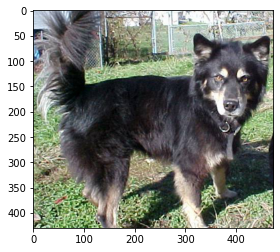

Its a dog


In [ ]:
test_image = image.load_img('/content/dog vs cat/dataset/test_set/dogs/dog.4012.jpg', target_size=(64, 64))
test_img = image.img_to_array(test_image)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis=0)
result = cnn.predict(test_img)
print(result)
plt.imshow(image.load_img('/content/dog vs cat/dataset/test_set/dogs/dog.4012.jpg'))
plt.show()
if result[0]<=0.5: print('Its a cat')
else: print('Its a dog')

##Hyperparameter tuning

In [ ]:
!pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=82acd9a4f9731260793eca0e56f396e9fd6b92734a54047df3ab018c039da3d5
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=a498f2a832e1bba6330076d5f340857ec08bd09e3549b31950bea4e68edc4c74
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(64,64,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
def create_model(hp):
  model = keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
  model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  for i in range(hp.Int('num_layers', 2, 20)):
    model.add(tf.keras.layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                                    kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),activation='relu'))
  keras.layers.Flatten(),
  keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
  keras.layers.Dense(1, activation='sigmoid')
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="cat_vs_dog")

INFO:tensorflow:Reloading Oracle from existing project output/cat_vs_dog/oracle.json


In [ ]:
tuner_search.search(train_dataset,epochs=10,validation_data=validation_dataset)

Trial 5 Complete [00h 04m 14s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 20m 17s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 48)        13872     
_________________________________________________________________
flatten (Flatten)            (None, 172800)            0         
_________________________________________________________________
dense (Dense)                (None, 48)                8294448   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 49        
Total params: 8,309,265
Trainable params: 8,309,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_dataset, epochs=10,validation_data=validation_dataset)

Epoch 1/10
200/200 [==============================] - 25s 121ms/step - loss: nan - accuracy: 0.5055 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
200/200 [==============================] - 24s 119ms/step - loss: nan - accuracy: 0.4921 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
200/200 [==============================] - 24s 118ms/step - loss: nan - accuracy: 0.5114 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
200/200 [==============================] - 24s 118ms/step - loss: nan - accuracy: 0.4961 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
200/200 [==============================] - 24s 118ms/step - loss: nan - accuracy: 0.4993 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
200/200 [==============================] - 24s 120ms/step - loss: nan - accuracy: 0.4993 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
200/200 [==============================] - 24s 118ms/step - loss: nan - accuracy: 0.5015 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
200/200 [=======

In [ ]:
import cv2
import os
import numpy as np
from random import shuffle

In [ ]:
train_dir = '/content/dog vs cat/dataset/training_set'
test_dir = '/content/dog vs cat/dataset/test_set'
img_size = 64
LR = 1e-3

model_name = 'catsvsdogs_classification'

In [ ]:
def img_label(img):
  label = img.split('.')[-3]
  if label == 'cat':  return 0
  elif label == 'dog':  return 1

In [ ]:
def train_data():
  training_data = []
  for subdir, dir, files in os.walk(train_dir):
    if files:
      for img in os.listdir(subdir):
        label = img_label(img)
        path = os.path.join(subdir, img)
        image = cv2.resize(cv2.imread(path, cv2.IMREAD_COLOR), (img_size,img_size))
        training_data.append([np.array(image), label])
  shuffle(training_data)
  np.save('train_data.npy', training_data)
  return training_data

In [ ]:
def test_data():
  testing_data = []
  for subdir, dir, files in os.walk(test_dir):
    if files:
      for img in os.listdir(subdir):
        label = img_label(img)
        path = os.path.join(subdir, img)
        image = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size,img_size))
        testing_data.append([np.array(image), label])
  shuffle(testing_data)
  np.save('test_data.npy', testing_data)
  return testing_data

In [ ]:
train_df = train_data()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
!pip install tflearn

     |████████████████████████████████| 112kB 5.9MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=60fca62052581b4c500f9034770af19385e14559bcade789c131285252e2ccf1
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [ ]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
import warnings

warnings.filterwarnings('ignore')

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name=model_name)

model = tflearn.DNN(convnet, tensorboard_dir='log')


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
train = train_df[:6000]
test = train_df[6000:]

In [ ]:
x = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 3)
y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, img_size, img_size, 3)
test_y = [i[1] for i in test]

In [ ]:
x = x/255.0
test_x = test_x/255.0

In [ ]:
cnn.fit(x=x,y=y, validation_data=(test_x,test_y), epochs=10)

Train on 6000 samples, validate on 2000 samples
Epoch 1/10
6000/6000 [==============================] - 3s 423us/sample - loss: 1.0022 - acc: 0.5385 - val_loss: 0.6663 - val_acc: 0.5780
Epoch 2/10
6000/6000 [==============================] - 2s 335us/sample - loss: 0.6678 - acc: 0.5938 - val_loss: 0.6594 - val_acc: 0.5935
Epoch 3/10
6000/6000 [==============================] - 2s 345us/sample - loss: 0.6518 - acc: 0.6055 - val_loss: 0.6780 - val_acc: 0.5880
Epoch 4/10
6000/6000 [==============================] - 2s 339us/sample - loss: 0.6340 - acc: 0.6343 - val_loss: 0.6389 - val_acc: 0.6425
Epoch 5/10
6000/6000 [==============================] - 2s 330us/sample - loss: 0.6216 - acc: 0.6470 - val_loss: 0.6215 - val_acc: 0.6545
Epoch 6/10
6000/6000 [==============================] - 2s 324us/sample - loss: 0.5932 - acc: 0.6882 - val_loss: 0.6061 - val_acc: 0.6740
Epoch 7/10
6000/6000 [==============================] - 2s 324us/sample - loss: 0.5720 - acc: 0.6975 - val_loss: 0.6330 - va